# Code to generate all figures on heatwaves events used in the paper
## note this is spread across multiple figures
## TODO: Update the specific list once we are done

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing
from datetime import timedelta, datetime
import xarray as xr
from matplotlib.lines import Line2D

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

# ugly hack to load in our plotting scripts
import sys
sys.path.append(basepath + "/docs/notebooks/")
import case_plotting as cp

In [2]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 IFS",
)

cira_heatwave_forecast_GC_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC IFS",
)

cira_heatwave_forecast_PANG_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG IFS",
)

cira_heatwave_forecast_FOURv2_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 GFS",
)

cira_heatwave_forecast_GC_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC GFS",
)

cira_heatwave_forecast_PANG_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG GFS",
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
    name="ECMWF HRES",
)

heat_metrics = [
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ]

FOURv2_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
]

GC_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
]

PANG_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
]

HRES_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

In [3]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

# defaults for plotting
fourv2_style = {'color': sns_palette[0]}
gc_style = {'color': sns_palette[2]}
pangu_style = {'color': sns_palette[3]}
hres_style = {'color': 'grey'}

ghcn_group_style = {'linestyle':'-', 'marker':'o', 'group':'GHCN'}
era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}

ifs_group_style = {'linestyle':'-', 'marker':'o', 'group':'IFS'}
gfs_group_style = {'linestyle':'-', 'marker':'d', 'group':'GFS'}


In [3]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()

# turn the dictionary into a list of case objects ()
ewb_cases = cases.load_individual_cases(case_dict)

ewb_fourv2 = evaluate.ExtremeWeatherBench(case_dict, FOURv2_HEAT_EVALUATION_OBJECTS)
ewb_gc = evaluate.ExtremeWeatherBench(case_dict, GC_HEAT_EVALUATION_OBJECTS)
ewb_pang = evaluate.ExtremeWeatherBench(case_dict, PANG_HEAT_EVALUATION_OBJECTS)
ewb_hres = evaluate.ExtremeWeatherBench(case_dict, HRES_HEAT_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


# the next two cells either load in your results from scratch (first cell) or you can load them from a saved pickle file (must faster)

In [ ]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box 
# if you have already saved them (from running this once), then skip this box
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_results = ewb_fourv2.run(parallel=True, n_jobs=n_processes, pre_compute=True)
gc_results = ewb_gc.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_results = ewb_pang.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_results = ewb_hres.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# save the results to make it more efficient
fourv2_results.to_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
gc_results.to_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')
pang_results.to_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results.to_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')


In [4]:
# load the results back in
fourv2_results = pd.read_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
pang_results = pd.read_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
hres_results = pd.read_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')
gc_results = pd.read_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')


# plotting and subsetting code

In [23]:
def subset_results_to_xarray(results_df, forecast_source, target_source, metric, init_time=None, case_id_list=None):
    """
    takes in one of the overall results tables and returns a multi-dimensional xarray for easier plotting 
    """
    # if the case_id_list is not empty, subset to the specific cases
    if (case_id_list is not None):
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & 
                            (results_df['metric'] == metric) & (results_df['case_id_number'].isin(case_id_list))]
    else:
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & (results_df['metric'] == metric)]

    subset = subset.astype({'lead_time':'timedelta64[ns]'})

    # if the init time is specified, subset that
    if (init_time == 'zeroz'):
        # convert to a timedelta object so we can grab zeroz
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 0]
    elif (init_time == 'twelvez'):
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 43200]

    # prepare for xarray conversion
    subset2 = subset.set_index(['lead_time', 'case_id_number']).sort_index()
    subset_xa = subset2.to_xarray()

    return subset_xa

def plot_results_by_metric(data, settings, title, filename=None):
    """
    Plots the results of the ExtremeWeatherBench for the data specified
    parameters:
        data: list of dictionaries containing the data to plot
        settings: list of dictionaries containing the settings for the plot
        title: string, the title of the plot
        filename: string, the filename to save the plot to
    """
    sns.set_theme(style='whitegrid')
    sns_palette = sns.color_palette("tab10")
    fig, ax = plt.subplots(figsize=(16,4))
    
    legend_elements = []
    legend_labels = list()

    for i, model in enumerate(data):
        my_mean = model['value'].mean('case_id_number')
        my_n = len(np.unique(model['case_id_number'].values))
        my_settings = settings[i]
        my_label = f"{my_settings['label_str']} (n={my_n})"

        line = plt.plot(my_mean, color=my_settings['color'], linewidth=2, label=my_label,
                linestyle=my_settings['linestyle'], marker=my_settings['marker'], markersize=10)
    
        # add any unique labels to the legend except for HRES (it gets its own line in the legend)
        if (my_label not in legend_labels and "HRES" not in my_label):
            legend_labels.append(my_label)
            legend_elements.append(Line2D([0], [0], color=my_settings['color'], lw=3, label=my_label))


    # set the xticks in days    
    xtick_str = [f"{int(my_time/ np.timedelta64(1, 'D')):d}" for my_time in model['lead_time'].values]
    ax.set_xticks(labels=xtick_str, ticks=np.arange(0, len(model['lead_time']), 1))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Lead Time (days)')
    plt.title(title)

    # now add the unique groups with markers
    my_groups = list()
    for my_settings in settings:
        if (my_settings['group'] not in my_groups):
            my_groups.append(my_settings['group'])
            print(my_settings['group'])
            legend_elements.append(Line2D([0], [0], color=my_settings['color'], marker=my_settings['marker'], markersize=10, 
                label=my_settings['group']))

    # and add the HRES line
    for my_settings in settings:
        my_label = f"{my_settings['label_str']} (n={my_n})"
        if ("HRES" in my_label):
            legend_elements.append(Line2D([0], [0], color=hres_style['color'], lw=2, label=my_label))

    ax.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1.0, 0.5))

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)

        


# example plots 

IFS


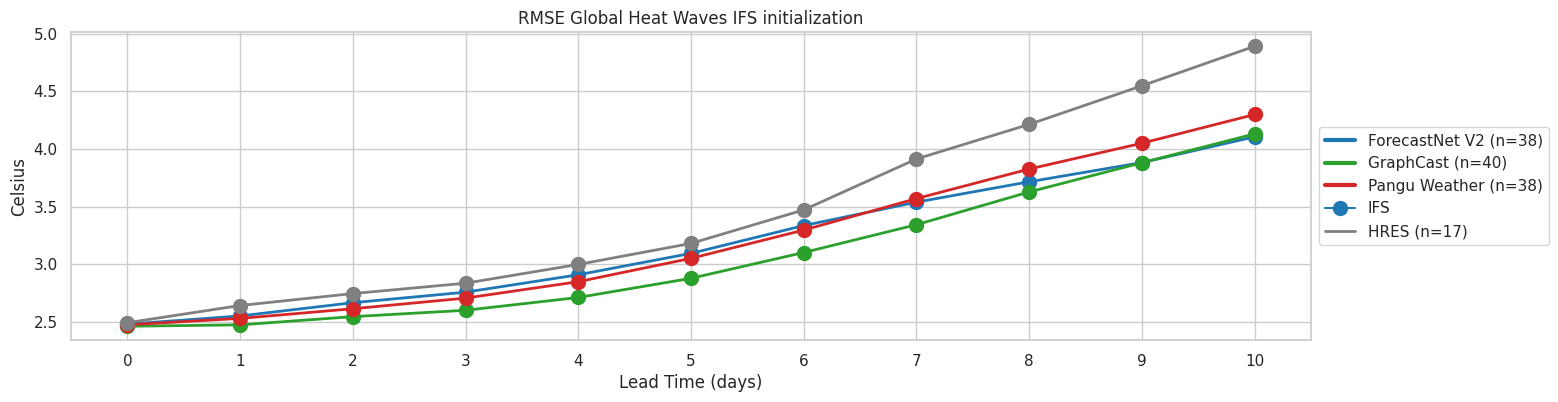

In [24]:
# plot the results for one metric for the three AI models versus HRES
fourv2_ifs_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2'} | fourv2_style | ifs_group_style
gc_ifs_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast'} | gc_style | ifs_group_style
pangu_ifs_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather'} | pangu_style | ifs_group_style
hres_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} | hres_style | ifs_group_style

fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')

plot_results_by_metric(data=[fourv2_ifs_plot, gc_ifs_plot, pangu_ifs_plot, hres_plot], 
        settings=[fourv2_ifs_settings, gc_ifs_settings, pangu_ifs_settings, hres_settings], 
        title='RMSE Global Heat Waves IFS initialization')


IFS
GFS


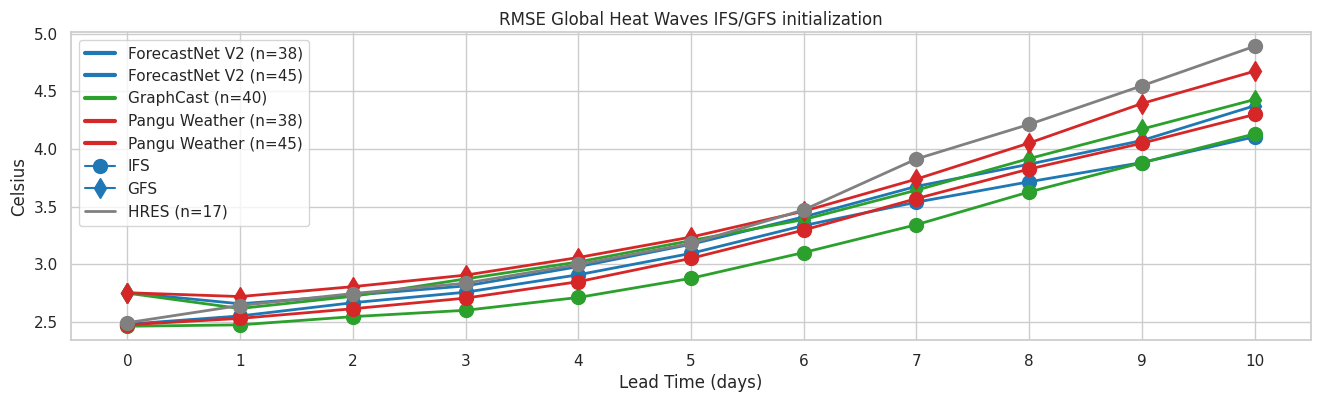

In [22]:
# compare IFS/GFS
fourv2_gfs_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} | fourv2_style | gfs_group_style
gc_gfs_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} | gc_style | gfs_group_style
pangu_gfs_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} | pangu_style | gfs_group_style

fourv2_gfs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_gfs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_gfs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_gfs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_gfs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_gfs_settings['forecast_source'], 
        target_source='GHCN', metric='rmse', init_time='zeroz')

data = [fourv2_ifs_plot, fourv2_gfs_plot, gc_ifs_plot, gc_gfs_plot, pangu_ifs_plot, pangu_gfs_plot, hres_plot]
settings = [fourv2_ifs_settings, fourv2_gfs_settings, gc_ifs_settings, gc_gfs_settings, pangu_ifs_settings, pangu_gfs_settings, hres_settings]
plot_results_by_metric(data=data, settings=settings, title='RMSE Global Heat Waves IFS/GFS initialization')


In [ ]:
# plot ERA5 versus GHCN for IFS
fourv2_ifs_ghcn_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (GHCN)'} | fourv2_style | ghcn_group_style
gc_ifs_ghcn_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (GHCN)'} | gc_style | ghcn_group_style
pangu_ifs_ghcn_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (GHCN)'} | pangu_style | ghcn_group_style
hres_ghcn_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES (GHCN)'} | hres_style | ghcn_group_style

fourv2_ifs_era5_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (ERA5)'} | fourv2_style | era5_group_style
gc_ifs_era5_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (ERA5)'} | gc_style | era5_group_style
pangu_ifs_era5_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (ERA5)'} | pangu_style | era5_group_style
hres_era5_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES (ERA5)'} | hres_style | era5_group_style

fourv2_ifs_ghcn_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_ghcn_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_ghcn_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_ghcn_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_ghcn_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_ghcn_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_ghcn_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_ghcn_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')

fourv2_ifs_era5_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_era5_settings['forecast_source'], 
                                                     target_source='ERA5', metric='rmse', init_time='zeroz')
gc_ifs_era5_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_era5_settings['forecast_source'], 
                                                 target_source='ERA5', metric='rmse', init_time='zeroz')
pangu_ifs_era5_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_era5_settings['forecast_source'],
                                           target_source='ERA5', metric='rmse', init_time='zeroz')
hres_era5_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_era5_settings['forecast_source'], 
                                    target_source='ERA5', metric='rmse', init_time='zeroz')

plot_data = [fourv2_ifs_ghcn_plot, fourv2_ifs_era5_plot, gc_ifs_ghcn_plot, gc_ifs_era5_plot, pangu_ifs_ghcn_plot, pangu_ifs_era5_plot, hres_ghcn_plot, hres_era5_plot]
plot_settings = [fourv2_ifs_ghcn_settings, fourv2_ifs_era5_settings, gc_ifs_ghcn_settings, gc_ifs_era5_settings, pangu_ifs_ghcn_settings, pangu_ifs_era5_settings, hres_ghcn_settings, hres_era5_settings]

plot_results_by_metric(data=plot_data, settings=plot_settings, title='RMSE Global Heat Waves ERA5/GHCN')


# to do the analysis at the regional level, subset the data into regions

In [ ]:
# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = cp.get_polygon_from_bounding_box(na_bounding_box)

# Europe bounding box
eu_bounding_box = [50, -15, 15, 75]
eu_bounding_box_polygon = cp.get_polygon_from_bounding_box(eu_bounding_box)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = cp.get_polygon_from_bounding_box(au_bounding_box)


In [ ]:
cp.plot_boxes(
    box_list=[na_bounding_box_polygon, eu_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
    filename=basepath + 'docs/notebooks/figs/figure3_part1_regions.png'
)

In [ ]:
# plot North America cases
cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_NA.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=eu_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_EU.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=au_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_AU.png', fill_boxes=True)

In [ ]:
# break the cases into different lists
na_cases = list()
eu_cases = list()
au_cases = list()

for heat_case in ewb_fourv2.case_operators:
    #print(heat_case.case_metadata)

    my_case = heat_case.case_metadata

    # collect the North America, Europe, and Australia cases
    if (shapely.intersects(my_case.location.geopandas.geometry[0], na_bounding_box_polygon)):
        na_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], eu_bounding_box_polygon)):
        eu_cases.append(my_case.case_id_number)
    elif (shapely.intersects(my_case.location.geopandas.geometry[0], au_bounding_box_polygon)):
        au_cases.append(my_case.case_id_number)

print(f'North America Cases: {na_cases}')
print(f'Europe Cases: {eu_cases}')
print(f'Australia Cases: {au_cases}')


In [ ]:
# plot the results for one metric for the three AI models versus HRES
na_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
na_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
na_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
na_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

na_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)
na_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_cases)


eu_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
eu_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
eu_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
eu_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

eu_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)
eu_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_cases)



au_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
au_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
au_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
au_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

au_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)
au_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_cases)


plot_results_by_metric(data=[na_fourv2_ifs_plot, na_gc_ifs_plot, na_pangu_ifs_plot, na_hres_plot], title='RMSE North American Heat Waves IFS initialization')
plot_results_by_metric(data=[eu_fourv2_ifs_plot, eu_gc_ifs_plot, eu_pangu_ifs_plot, eu_hres_plot], title='RMSE European Heat Waves IFS initialization')
plot_results_by_metric(data=[au_fourv2_ifs_plot, au_gc_ifs_plot, au_pangu_ifs_plot, au_hres_plot], title='RMSE Australia Heat Waves IFS initialization')


In [ ]:
# look through the north america cases to decide which one to look in depth
for heat_case in ewb_cases.cases:
    
    if (heat_case.case_id_number in na_cases):
        print(heat_case)  

        #plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, fill_boxes=True, event_id=my_case.case_id_number)



In [ ]:
my_case = ewb_cases.select_cases('case_id_number',3)


In [ ]:
my_fourv2_ifs_plot = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2 (IFS)', 'color': fourv2_color, 'linestyle':'-', 'marker':'o'}
my_gc_ifs_plot = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast (IFS)', 'color': gc_color, 'linestyle':'-', 'marker':'o'}
my_pangu_ifs_plot = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather (IFS)', 'color': pangu_color, 'linestyle':'-', 'marker':'o'}
my_hres_plot = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES', 'color': hres_color, 'linestyle':'-', 'marker':'o'}

my_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])
my_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[3])


plot_results_by_metric(data=[my_fourv2_ifs_plot, my_gc_ifs_plot, my_pangu_ifs_plot, my_hres_plot], title='RMSE Case ID 3 initialization')


my_fourv2_ifs_plot['values'] = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_plot['forecast_source'], 
                                                     target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_gc_ifs_plot['values'] = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_plot['forecast_source'], 
                                                 target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_pangu_ifs_plot['values'] = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_plot['forecast_source'],
                                           target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])
my_hres_plot['values'] = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_plot['forecast_source'], 
                                    target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[3])

plot_results_by_metric(data=[my_fourv2_ifs_plot, my_gc_ifs_plot, my_pangu_ifs_plot, my_hres_plot], title='Maximum Temperature MAE Case ID 3 initialization')



In [ ]:
# show the individual data for this case
era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
heatwave_dataset = cp.generate_heatwave_dataset(era5, temp_climatology_ds, my_case)
cp.generate_heatwave_plots(heatwave_dataset, my_case)